# Importing Libraries


In [1]:
import pandas as pd
import numpy as np

# Importing data

In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_61b46870208d4c71b4b23e24521d46f5 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='--A2Ov7nEa4VsrG6ktPIjcmKABuRtgdgGsr4vof9i2LC',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_61b46870208d4c71b4b23e24521d46f5.get_object(Bucket='windenergymodel-donotdelete-pr-kjyw30rlou9arv',Key='datasets.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_excel(body)
data.head()


,Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Weather conditions,Energy(j)
0,5.311336,416.328908,259.994904,Rainy,380.047790
1,5.672167,519.917511,268.641113,Sunny,453.769196
2,5.216037,390.900016,272.564789,Windy,306.376587
3,5.659674,516.127569,271.258087,Cloudy,419.645904
4,5.577941,491.702972,265.674286,Rainy,380.650696


In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.tail()

,Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Weather conditions,Energy(j)
2993,11.90111,3505.728252,174.044998,Sunny,0.0
2994,12.26673,3557.467688,175.485199,Windy,0.0
2995,12.70188,3591.145387,177.561798,Cloudy,0.0
2996,11.74359,3476.322759,174.727493,Rainy,0.0
2997,12.03967,3527.984411,175.540405,cloudy,0.0


In [5]:
data['Weather conditions'].unique()

array(['Rainy', 'Sunny', 'Windy', 'Cloudy', 'cloudy'], dtype=object)

In [6]:
data['Weather conditions'].value_counts()

Rainy     750
Cloudy    749
Windy     749
Sunny     749
cloudy      1
Name: Weather conditions, dtype: int64

In [7]:
data.describe()

,Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Energy(j)
count,2998.000000,2998.000000,2998.000000,2998.000000
mean,8.691706,1857.911190,177.181812,19070.200996
std,4.666365,1476.151323,74.731869,18070.974623
min,0.000000,0.000000,0.000000,0.000000
25%,5.033696,344.321037,150.102901,2342.030000
50%,8.152268,1618.362974,197.397896,14001.650000
75%,12.428110,3573.358764,213.623257,32377.275000
max,22.497311,3600.000000,358.189789,59918.300000


In [8]:
data.shape

(2998, 5)

# Dataprocessing

In [9]:
# checking missing values
data.isnull().any()


Wind Speed (m/s)                 False
Theoretical_Power_Curve (KWh)    False
Wind Direction (°)               False
Weather conditions               False
Energy(j)                        False
dtype: bool

# Label encoder


In [10]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
data["Weather conditions"]=l.fit_transform(data["Weather conditions"])

In [11]:
data

,Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Weather conditions,Energy(j)
0,5.311336,416.328908,259.994904,1,380.047790
1,5.672167,519.917511,268.641113,2,453.769196
2,5.216037,390.900016,272.564789,3,306.376587
3,5.659674,516.127569,271.258087,0,419.645904
4,5.577941,491.702972,265.674286,1,380.650696
5,5.604052,499.436385,264.578613,2,11546.800000
6,5.793008,557.372363,266.163605,3,8360.760000
7,5.306050,414.898179,257.949493,0,6426.640000
8,5.584629,493.677652,253.480698,1,9349.450000
9,5.523228,475.706783,258.723785,2,18613.600000


# Spilting of data¶

In [12]:
x=data.iloc[:,0:4].values
y=data.iloc[:,4:5].values


In [13]:
x

array([[5.31133604e+00, 4.16328908e+02, 2.59994904e+02, 1.00000000e+00],
       [5.67216682e+00, 5.19917511e+02, 2.68641113e+02, 2.00000000e+00],
       [5.21603680e+00, 3.90900016e+02, 2.72564789e+02, 3.00000000e+00],
       ...,
       [1.27018805e+01, 3.59114539e+03, 1.77561798e+02, 0.00000000e+00],
       [1.17435904e+01, 3.47632276e+03, 1.74727493e+02, 1.00000000e+00],
       [1.20396700e+01, 3.52798441e+03, 1.75540405e+02, 4.00000000e+00]])

In [14]:
y

array([[380.04779 ],
       [453.769196],
       [306.376587],
       ...,
       [  0.      ],
       [  0.      ],
       [  0.      ]])

In [15]:
x.shape

(2998, 4)

# one hot encoder

In [16]:
from sklearn.preprocessing import OneHotEncoder
o= OneHotEncoder()
z=o.fit_transform(x[:,3:4]).toarray()

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [17]:
z

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [18]:
z.shape

(2998, 5)

In [19]:
x=np.delete(x,3,axis=1)
x=np.concatenate((z,x),axis=1)

In [20]:
x.shape

(2998, 8)

In [21]:
y.shape

(2998, 1)

# Training the sets

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [23]:
x_train.shape

(2398, 8)

In [24]:
y_train.shape

(2398, 1)

In [25]:
x_test.shape

(600, 8)

In [26]:
y_test.shape

(600, 1)

# Multilinear Regression

In [27]:
from sklearn.linear_model import LinearRegression
mlr=LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
y_pred=mlr.predict(x_test)

In [29]:
y_test

array([[22786.   ],
       [ 5033.64 ],
       [ 1512.94 ],
       [    0.   ],
       [    0.   ],
       [45628.2  ],
       [    0.   ],
       [51633.1  ],
       [    0.   ],
       [    0.   ],
       [ 2471.18 ],
       [ 9493.19 ],
       [35811.4  ],
       [28529.2  ],
       [ 1781.3  ],
       [28308.1  ],
       [27467.7  ],
       [33390.2  ],
       [ 9833.71 ],
       [11025.2  ],
       [ 6016.65 ],
       [15374.1  ],
       [ 6150.89 ],
       [    0.   ],
       [57074.7  ],
       [11496.4  ],
       [    0.   ],
       [18784.1  ],
       [ 8662.28 ],
       [34740.   ],
       [ 4691.   ],
       [    0.   ],
       [44291.2  ],
       [    0.   ],
       [40549.8  ],
       [    0.   ],
       [41616.2  ],
       [47609.8  ],
       [11090.6  ],
       [ 6181.31 ],
       [53993.8  ],
       [ 3297.49 ],
       [41877.5  ],
       [17522.6  ],
       [    0.   ],
       [14449.3  ],
       [33288.3  ],
       [57352.3  ],
       [15075.   ],
       [45096.8  ],


In [30]:
from sklearn.metrics import r2_score
acc=r2_score(y_test,y_pred)

In [31]:
acc

-0.0009158045852226682

# Decision Tree Regression

In [33]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(random_state=0)
dtr.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [34]:
dtrpre=dtr.predict(x_test)

In [35]:
dtrpre

array([12413.7     , 30044.1     , 21380.8     ,  1937.52    ,
        3139.64    , 52035.6     , 49121.5     ,  2542.56    ,
           0.      , 16704.6     , 34603.3     ,     0.      ,
       18004.6     ,  3063.28    ,  1969.69    , 37388.4     ,
       34753.3     ,  1377.1     ,     0.      , 42895.6     ,
       15141.3     ,  4198.94    , 55362.9     ,   680.835   ,
       20542.1     , 34225.7     , 20573.6     , 56223.4     ,
       19982.2     , 23066.9     ,  5872.97    ,     0.      ,
        6861.48    , 35114.      ,     0.      ,     0.      ,
        3390.43    ,     0.      ,  8151.48    , 37722.2     ,
       14204.3     , 24323.5     ,   986.305   , 54116.9     ,
           0.      , 38638.1     , 32886.5     , 58279.6     ,
        1125.15    , 32614.3     , 17821.4     ,  8078.85    ,
        4002.03    , 48961.6     ,     0.      , 23178.7     ,
           0.      , 52439.4     , 28380.8     , 38271.6     ,
           0.      , 17670.1     ,     0.      ,  5529.

In [36]:
y_test

array([[22786.   ],
       [ 5033.64 ],
       [ 1512.94 ],
       [    0.   ],
       [    0.   ],
       [45628.2  ],
       [    0.   ],
       [51633.1  ],
       [    0.   ],
       [    0.   ],
       [ 2471.18 ],
       [ 9493.19 ],
       [35811.4  ],
       [28529.2  ],
       [ 1781.3  ],
       [28308.1  ],
       [27467.7  ],
       [33390.2  ],
       [ 9833.71 ],
       [11025.2  ],
       [ 6016.65 ],
       [15374.1  ],
       [ 6150.89 ],
       [    0.   ],
       [57074.7  ],
       [11496.4  ],
       [    0.   ],
       [18784.1  ],
       [ 8662.28 ],
       [34740.   ],
       [ 4691.   ],
       [    0.   ],
       [44291.2  ],
       [    0.   ],
       [40549.8  ],
       [    0.   ],
       [41616.2  ],
       [47609.8  ],
       [11090.6  ],
       [ 6181.31 ],
       [53993.8  ],
       [ 3297.49 ],
       [41877.5  ],
       [17522.6  ],
       [    0.   ],
       [14449.3  ],
       [33288.3  ],
       [57352.3  ],
       [15075.   ],
       [45096.8  ],


In [37]:
from sklearn.metrics import r2_score
a=r2_score(y_test,dtrpre)

In [38]:
a

-0.6545719039558708

In [39]:
dtpred=dtr.predict([[0,1,0,0,6.7,800,100,200]])

In [40]:
dtpred

array([15702.8])

# random forest regression


In [41]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=10,random_state=0)
rfr.fit(x_train,y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [42]:
import pickle
pickle.dump(rfr,open('ModelEnergy.pkl','wb'))

In [43]:
rfrpre=rfr.predict(x_test)

In [44]:
rfrpre

array([16037.63     , 14215.01     , 14473.33     , 17070.77     ,
        8352.058    , 14811.246    , 18630.32     ,  6693.4386   ,
       14019.767    , 29330.619    ,  8394.674    ,  7893.018    ,
       14205.816    , 17178.1899   , 10391.862    , 45745.17     ,
       23640.051    , 14461.7      ,  7954.608    , 37256.29     ,
       12068.87     , 19582.804    , 29995.36     , 15936.4705   ,
        7565.982    , 30572.953    , 21088.258    , 53632.02     ,
       15885.774    , 32155.21     , 11854.104    , 14289.3854   ,
       23199.5284377, 29413.93     , 19083.7731   ,  4758.709    ,
        8807.774    , 18937.0367   , 12105.697    , 22939.535    ,
       18585.44     , 15168.065    ,   915.206    , 52088.87     ,
        6781.268    , 29841.93     , 33774.11     , 41338.68     ,
       20286.9176   , 20684.62     , 27552.591    ,  4530.347    ,
        8647.483    , 37107.12     , 24021.98     , 20751.19     ,
       13599.473    , 33012.189    , 19739.02     , 20834.713 

In [45]:
y_test

array([[22786.   ],
       [ 5033.64 ],
       [ 1512.94 ],
       [    0.   ],
       [    0.   ],
       [45628.2  ],
       [    0.   ],
       [51633.1  ],
       [    0.   ],
       [    0.   ],
       [ 2471.18 ],
       [ 9493.19 ],
       [35811.4  ],
       [28529.2  ],
       [ 1781.3  ],
       [28308.1  ],
       [27467.7  ],
       [33390.2  ],
       [ 9833.71 ],
       [11025.2  ],
       [ 6016.65 ],
       [15374.1  ],
       [ 6150.89 ],
       [    0.   ],
       [57074.7  ],
       [11496.4  ],
       [    0.   ],
       [18784.1  ],
       [ 8662.28 ],
       [34740.   ],
       [ 4691.   ],
       [    0.   ],
       [44291.2  ],
       [    0.   ],
       [40549.8  ],
       [    0.   ],
       [41616.2  ],
       [47609.8  ],
       [11090.6  ],
       [ 6181.31 ],
       [53993.8  ],
       [ 3297.49 ],
       [41877.5  ],
       [17522.6  ],
       [    0.   ],
       [14449.3  ],
       [33288.3  ],
       [57352.3  ],
       [15075.   ],
       [45096.8  ],


In [46]:
from sklearn.metrics import r2_score
accuracy=r2_score(y_test,rfrpre)

In [47]:
accuracy

-0.09291554082679787

In [48]:
rfrpred=rfr.predict([[1,0,0,0,2.4,900,600,700]])

In [49]:
rfrpred

array([27632.94])

# polynomial regression


In [50]:
from sklearn .preprocessing import PolynomialFeatures
polynomial_reg=PolynomialFeatures(degree=4)
x_polynomial=polynomial_reg.fit_transform(x)

In [51]:
x

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        5.31133604e+00, 4.16328908e+02, 2.59994904e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        5.67216682e+00, 5.19917511e+02, 2.68641113e+02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.21603680e+00, 3.90900016e+02, 2.72564789e+02],
       ...,
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.27018805e+01, 3.59114539e+03, 1.77561798e+02],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        1.17435904e+01, 3.47632276e+03, 1.74727493e+02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.20396700e+01, 3.52798441e+03, 1.75540405e+02]])

In [52]:
x_polynomial

array([[1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        1.17166324e+10, 7.31696659e+09, 4.56940171e+09],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.95080494e+10, 1.00797992e+10, 5.20822712e+09],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.13519607e+10, 7.91543781e+09, 5.51923650e+09],
       ...,
       [1.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        4.06597819e+11, 2.01039590e+10, 9.94026900e+08],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        3.68945890e+11, 1.85440176e+10, 9.32062393e+08],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.83537213e+11, 1.90834964e+10, 9.49529336e+08]])

In [58]:
polynomial_reg.fit(x_polynomial,y)

PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)

In [59]:
polynomial=LinearRegression()
polynomial.fit(x_polynomial,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [60]:
polynomialpred = polynomial.predict(x_polynomial)

In [61]:
polynomialpred

array([[19479.24360837],
       [20823.58805224],
       [18532.59587106],
       ...,
       [17199.79827911],
       [15600.68778559],
       [-3120.53720852]])

In [63]:
polynomialacc = r2_score(y,polynomialpred)

In [64]:
polynomialacc

0.060123418150592634

# Feature scaling

In [65]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
x_train=s.fit_transform(x_train)
x_test=s.fit_transform(x_test)

# Data Visualisation

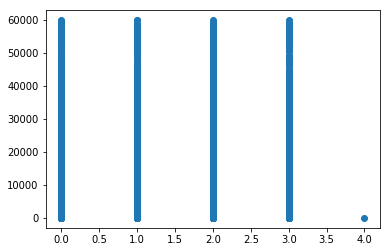

In [67]:
import matplotlib.pyplot as plt
plt.scatter(data["Weather conditions"],data["Energy(j)"])

In [68]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

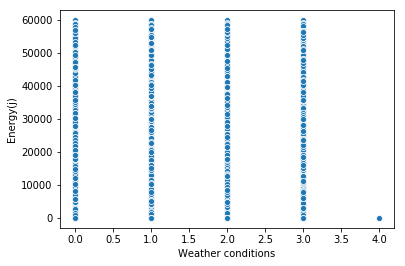

In [69]:
sns.scatterplot(x = "Weather conditions", y = "Energy(j)", data = data)

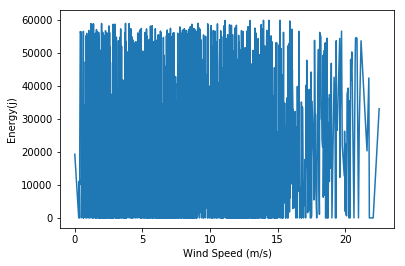

In [70]:
sns.lineplot(x="Wind Speed (m/s)",y="Energy(j)",data =data)

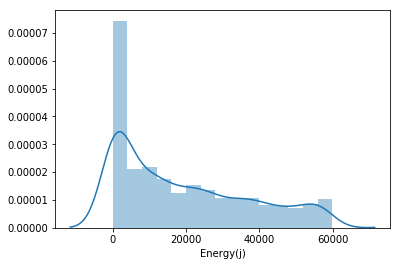

In [71]:
sns.distplot(data['Energy(j)'])

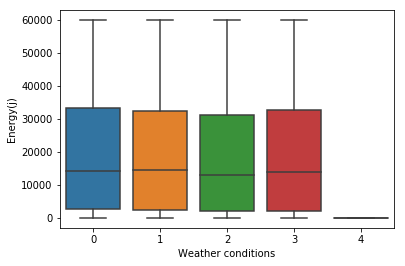

In [72]:
sns.boxplot(x="Weather conditions",y="Energy(j)",data = data)

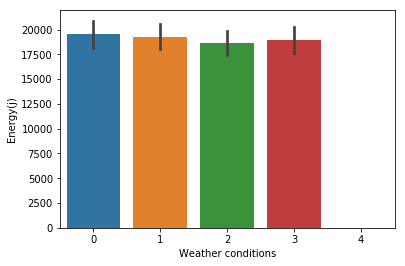

In [74]:
sns.barplot(x = "Weather conditions",y="Energy(j)",data = data)

In [75]:
data.corr()

,Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Weather conditions,Energy(j)
Wind Speed (m/s),1.000000,0.944467,0.080876,0.000153,0.028624
Theoretical_Power_Curve (KWh),0.944467,1.000000,0.109009,0.002074,0.032158
Wind Direction (°),0.080876,0.109009,1.000000,0.005327,0.055183
Weather conditions,0.000153,0.002074,0.005327,1.000000,-0.015070
Energy(j),0.028624,0.032158,0.055183,-0.015070,1.000000


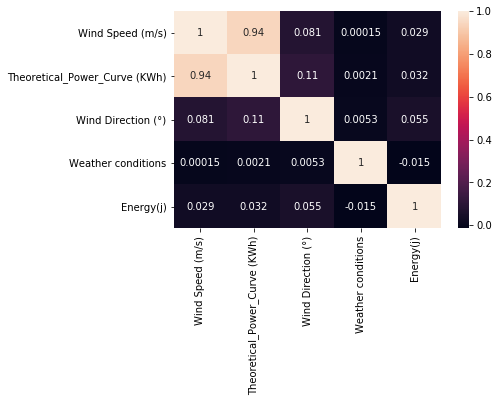

In [76]:
sns.heatmap(data.corr(),annot = True )